In [1]:
import torch
import matplotlib.pyplot as plt
from torch.distributions.multivariate_normal import MultivariateNormal
plt.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 14})

In [ ]:
import time
import tqdm
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 
import torch.utils.data as utils
import torch.nn.init as init
from torch.autograd import Variable
import sys
sys.path.append("../new_flows")
from flows import RealNVP, Planar, MAF
from models import NormalizingFlowModel

In [ ]:
import torch
import torch.optim as optim
import torch.nn.functional as F
from argparse import ArgumentParser
from torch.distributions import MultivariateNormal
from models import NormalizingFlowModel

In [ ]:
ndim = 2

In [ ]:
N_EPOCHS = 30
PRINT_INTERVAL = 2000
NUM_WORKERS = 4
LR = 1e-4

#N_FLOWS = 6 
#Z_DIM = 8

N_FLOWS = 10
Z_DIM = 8

n_steps = 0

In [ ]:
####MAF 
class VAE_NF(nn.Module):
    def __init__(self, K, D):
        super().__init__()
        self.dim = D
        self.K = K
        self.encoder = nn.Sequential(
            nn.Linear(2, 30),
            nn.LeakyReLU(True),
            nn.Linear(30, 30),
            nn.LeakyReLU(True),
            nn.Linear(30, 20),
            nn.LeakyReLU(True),
            nn.Linear(20, D * 2)
        )

        self.decoder = nn.Sequential(
            nn.Linear(D, 20),
            nn.LeakyReLU(True),
            nn.Linear(20, 30),
            nn.LeakyReLU(True),
            nn.Linear(30, 30),
            nn.LeakyReLU(True),
            nn.Linear(30, 2)
        )
        
        flow_init = MAF(dim=D)
        flows_init = [flow_init for _ in range(K)]
        prior = MultivariateNormal(torch.zeros(D).cuda(), torch.eye(D).cuda())
        self.flows = NormalizingFlowModel(prior, flows_init)

    def forward(self, x):
        # Run Encoder and get NF params
        enc = self.encoder(x)
        mu = enc[:, :self.dim]
        log_var = enc[:, self.dim: self.dim * 2]

        # Re-parametrize
        sigma = (log_var * .5).exp()
        z = mu + sigma * torch.randn_like(sigma)
        kl_div = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
        # Construct more expressive posterior with NF
        
        z_k, _, sum_ladj = self.flows(z)
        
        kl_div = kl_div / x.size(0) - sum_ladj.mean()  # mean over batch

        # Run Decoder
        x_prime = self.decoder(z_k)
        return x_prime, kl_div

In [2]:
ndim = 2

In [3]:
dista_mean = torch.zeros(ndim)

In [4]:
dista_mean.type()

'torch.FloatTensor'

In [5]:
distb_mean = torch.zeros(ndim).normal_(0., 10.)

In [10]:
distb_mean

tensor([4.7409, 8.7702])

In [31]:
sigma_a = torch.rand(ndim, ndim)

sigma_a = torch.mm(sigma_a, sigma_a.t())

sigma_a.add_(torch.eye(ndim))

tensor([[2.1595, 0.4481],
        [0.4481, 1.1757]])

# sigma_a = torch.tensor([[2.2828, 1.3097], [1.3097, 2.5028]])
# sigma_b = torch.tensor([[ 2.3829, -0.7521],[-0.7521,  0.9825]])

In [188]:
sigma_a

tensor([[2.2828, 1.3097],
        [1.3097, 2.5028]])

In [43]:
sigma_b = torch.rand(ndim, ndim)

sigma_b = torch.mm(sigma_b, sigma_b.t())

sigma_b.add_(torch.eye(ndim))

In [38]:
dista = MultivariateNormal(dista_mean,sigma_a)

distb = MultivariateNormal(distb_mean,sigma_b)

In [47]:
samplea_plot = dista.rsample([100])

sampleb_plot = distb.rsample([100])

plt.scatter(samplea_plot[:,0],samplea_plot[:,1],color='r',alpha= 0.5)
plt.scatter(sampleb_plot[:,0],sampleb_plot[:,1],color='b',alpha= 0.5)

# First Case, Moderate separation, distb_mean = [4.7409, 8.7702]

In [ ]:
class Case:
    def __init__(self, casestring, meanbase, meantarget, sigmabase, sigmatarget):
        self.casestring = casestring
        self.meanbase = meanbase
        self.meantarget = meantarget 
        self.sigmabase = sigmabase
        self.sigmatarget = sigmatarget
        self.distbase = MultivariateNormal(meanbase,sigmabase)
        self.disttarget = MultivariateNormal(meantarget,sigmatarget)
        
    def train_model(self, case, dist_base, dist_test):
    

    def get_NLL(self, case, dist_base, dist_test):

    def get_Loss():

    def get_Wasserstein():

    def get_NLL_Loss_Wasserstein():
    
    def randomly_regenerate(self)

    def make_scatterplot(self):
        samplebase_plot = self.distbase.rsample([130])
        sampletest_plot = self.disttest.rsample([130])
        plt.scatter(samplebase_plot[:,0],samplebase_plot[:,1],color='r',alpha= 0.5, label='base')
        plt.scatter(sampletest_plot[:,0],sampletest_plot[:,1],color='b',alpha= 0.5, label='test')
        plt.legend()
        plt.savefig(f'./figures/scatterplot_{case}.png')
        plt.show()
    


In [6]:
moderate_separation = {}

In [ ]:
moderate_separation['case'] = "moderate_separation"

In [50]:
dista_mean = torch.zeros(ndim)

tensor([0., 0.])

In [4]:
distb_mean = torch.tensor([4.7409, 8.7702])

In [147]:
import sklearn.datasets as skdata

In [178]:
sigma_b = skdata.make_spd_matrix(2)

In [179]:
sigma_b = torch.tensor(sigma_b,dtype=torch.float)

In [180]:
#sigma_b = torch.rand(ndim, ndim) 

#sigma_b = torch.mm(sigma_b, sigma_b.t()) 

#sigma_b.add_(torch.eye(ndim))

In [181]:
#sigma_a = torch.tensor([[1.9780, 0.1066],[0.1066, 1.3919]])
#sigma_b = torch.tensor([[1.1162, 0.3408],[0.3408, 2.0634]])

In [187]:
sigma_b

tensor([[ 2.3829, -0.7521],
        [-0.7521,  0.9825]])

In [182]:
dista = MultivariateNormal(dista_mean,sigma_a)
distb = MultivariateNormal(distb_mean,sigma_b)

In [185]:
samplea_plot = dista.rsample([200])
sampleb_plot = distb.rsample([200])



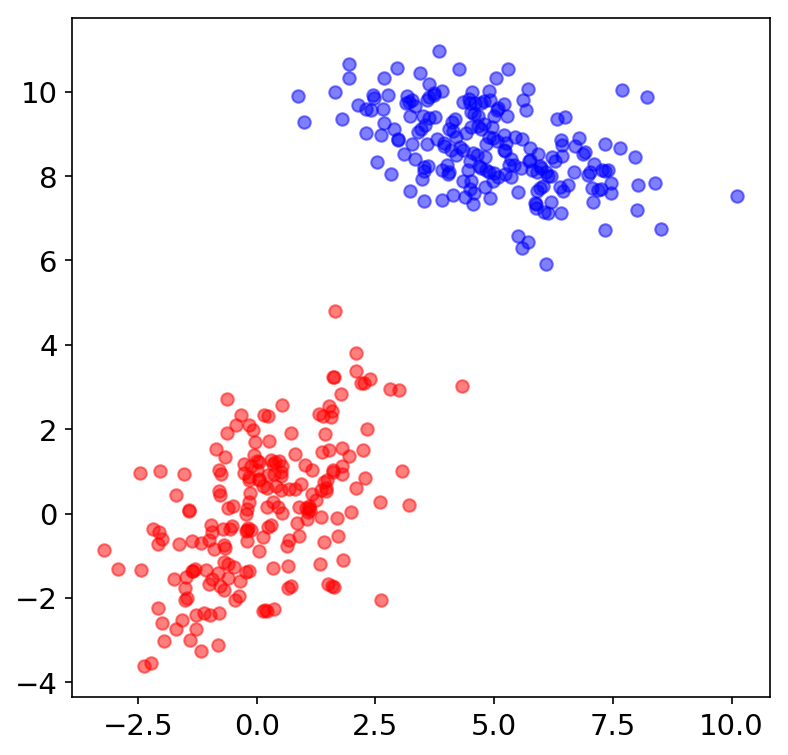

In [186]:
plt.scatter(samplea_plot[:,0],samplea_plot[:,1],color='r',alpha= 0.5)
plt.scatter(sampleb_plot[:,0],sampleb_plot[:,1],color='b',alpha= 0.5)

In [ ]:
def train_model(case, dist_base, dist_test):
    

def get_NLL(case, dist_base, dist_test):

def get_Loss():

def get_Wasserstein():

def get_NLL_Loss_Wasserstein():
    

def make_scatterplot(case, dist_base, dist_test):
    samplebase_plot = dista.rsample([130])
    sampletest_plot = distb.rsample([130])
    plt.scatter(samplebase_plot[:,0],samplebase_plot[:,1],color='r',alpha= 0.5, label='base')
    plt.scatter(sampletest_plot[:,0],sampletest_plot[:,1],color='b',alpha= 0.5, label='test')
    plt.legend()
    plt.savefig(f'./figures/scatterplot_{case}.png')
    plt.show()
    


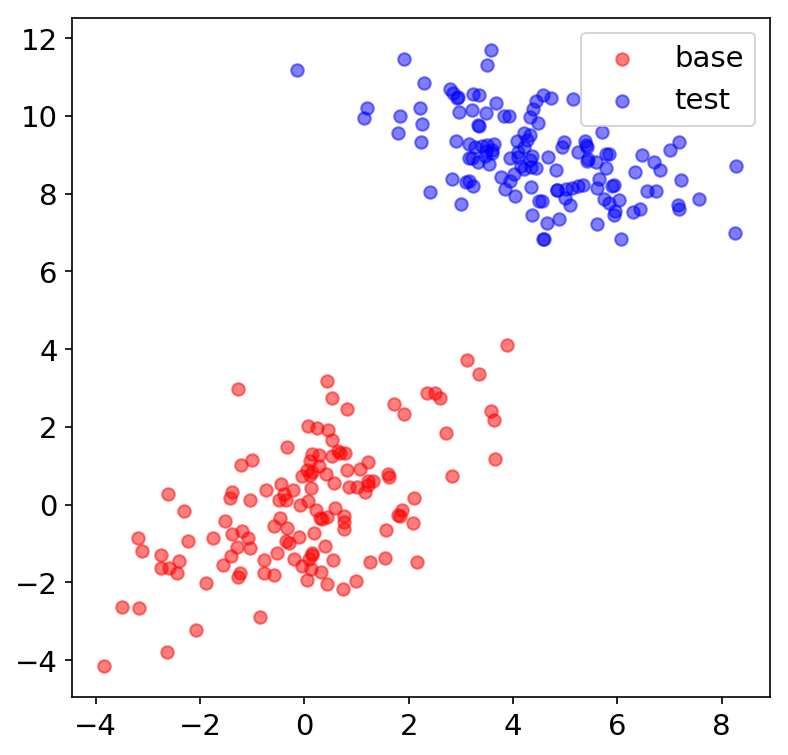

In [190]:
make_scatterplot("moderate_separation",dista,distb)

In [ ]:
def make_plots():
    

In [ ]:
sample = distb.rsample([10000])

In [13]:
sample.shape

torch.Size([10000, 100])

In [14]:
NLL = -dista.log_prob(sample)

In [15]:
NLL

tensor([2538.7844, 2165.9854, 2127.8879,  ..., 2315.6997, 2247.3738,
        2263.1704])

In [16]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 14})
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import wasserstein_distance

In [17]:
MSEloss = torch.mean((sample- dista_mean)**2,dim=1)

In [18]:
MSEloss

tensor([124.0900, 136.5656, 127.2197,  ..., 155.9555, 120.6306, 128.4859])

In [19]:
MSEloss.size()

torch.Size([10000])

In [20]:
plotrange = np.where((MSEloss<200) & (NLL<2200))[0]

In [21]:
pearsonr_MSENLL = pearsonr(MSEloss, NLL)


Text(100, 2000, 'pearson correlation = 0.1756')

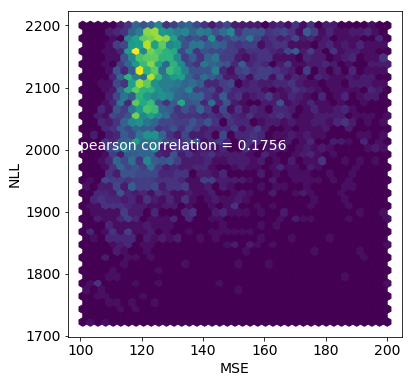

In [22]:
plt.hexbin(MSEloss[plotrange],NLL[plotrange],gridsize=40)
plt.xlabel('MSE')
plt.ylabel('NLL')
plt.text(100,2000,f'pearson correlation = {pearsonr_MSENLL[0]:.4f}',color='white')
#plt.text(1,2.1,f'evaluated on QCD',color='white')

In [23]:
vfunc = np.vectorize(wasserstein_distance,signature='(n),(n)->()')


In [24]:
wasserstein1d = vfunc(sample, dista_mean)

In [25]:
wasserstein1d.shape

(10000,)

In [26]:
pearsonr_MSENLL = pearsonr(MSEloss, NLL)


In [27]:
pearsonr_MSEWAS = pearsonr(MSEloss, wasserstein1d)
pearsonr_NLLWAS = pearsonr(NLL, wasserstein1d)

In [28]:
pearsonr_MSEWAS

(0.9858094209799457, 0.0)

In [29]:
pearsonr_NLLWAS

(0.05666340391868877, 1.4264112310449954e-08)

In [31]:
plotrange1 = np.where((MSEloss<300) & (wasserstein1d<14))[0]

Text(120, 13, 'pearson correlation = 0.9858')

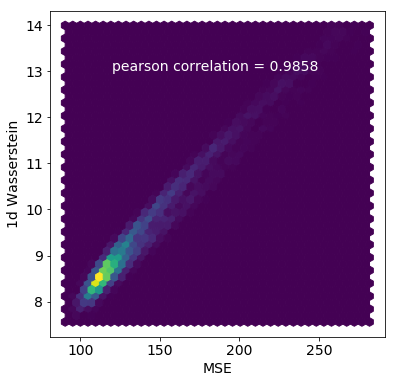

In [33]:
plt.hexbin(MSEloss[plotrange1],wasserstein1d[plotrange1],gridsize=40)
plt.xlabel('MSE')
plt.ylabel('1d Wasserstein')
plt.text(120,13,f'pearson correlation = {pearsonr_MSEWAS[0]:.4f}',color='white')
##plt.text(1,2.1,f'evaluated on QCD',color='white')

In [35]:
plotrange2 = np.where((MSEloss<300) & (wasserstein1d<14))[0]

Text(1400, 13, 'pearson correlation = 0.0567')

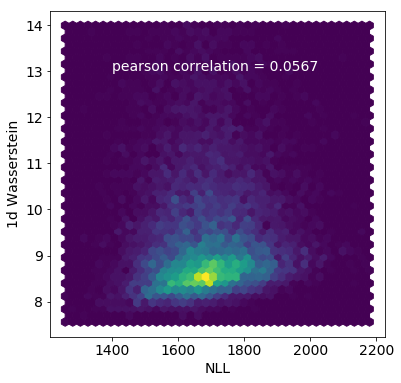

In [38]:
plt.hexbin(NLL[plotrange2],wasserstein1d[plotrange2],gridsize=40)
plt.xlabel('NLL')
plt.ylabel('1d Wasserstein')
plt.text(1400,13,f'pearson correlation = {pearsonr_NLLWAS[0]:.4f}',color='white')
##plt.text(1,2.1,f'evaluated on QCD',color='white')

In [39]:
import time
import tqdm
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 
import torch.utils.data as utils
import torch.nn.init as init
from torch.autograd import Variable
import sys
sys.path.append("../new_flows")
from flows import RealNVP, Planar, MAF
from models import NormalizingFlowModel

In [40]:
import torch
import torch.optim as optim
import torch.nn.functional as F
from argparse import ArgumentParser
from torch.distributions import MultivariateNormal
from models import NormalizingFlowModel

In [41]:
####MAF 
class VAE_NF(nn.Module):
    def __init__(self, K, D):
        super().__init__()
        self.dim = D
        self.K = K
        self.encoder = nn.Sequential(
            nn.Linear(100, 50),
            nn.LeakyReLU(True),
            nn.Linear(50, 30),
            nn.LeakyReLU(True),
            nn.Linear(30, 20),
            nn.LeakyReLU(True),
            nn.Linear(20, D * 2)
        )

        self.decoder = nn.Sequential(
            nn.Linear(D, 20),
            nn.LeakyReLU(True),
            nn.Linear(20, 30),
            nn.LeakyReLU(True),
            nn.Linear(30, 50),
            nn.LeakyReLU(True),
            nn.Linear(50, 100)
        )
        
        flow_init = MAF(dim=D)
        flows_init = [flow_init for _ in range(K)]
        prior = MultivariateNormal(torch.zeros(D).cuda(), torch.eye(D).cuda())
        self.flows = NormalizingFlowModel(prior, flows_init)

    def forward(self, x):
        # Run Encoder and get NF params
        enc = self.encoder(x)
        mu = enc[:, :self.dim]
        log_var = enc[:, self.dim: self.dim * 2]

        # Re-parametrize
        sigma = (log_var * .5).exp()
        z = mu + sigma * torch.randn_like(sigma)
        kl_div = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
        # Construct more expressive posterior with NF
        
        z_k, _, sum_ladj = self.flows(z)
        
        kl_div = kl_div / x.size(0) - sum_ladj.mean()  # mean over batch

        # Run Decoder
        x_prime = self.decoder(z_k)
        return x_prime, kl_div

In [42]:
N_EPOCHS = 30
PRINT_INTERVAL = 2000
NUM_WORKERS = 4
LR = 1e-4

#N_FLOWS = 6 
#Z_DIM = 8

N_FLOWS = 10
Z_DIM = 8

n_steps = 0

In [47]:
train_data = dista.rsample([100000])

In [48]:
total_PureBkg_selection = torch.tensor(train_data)

/data/t3home000/spark/miniconda3/envs/fewshot/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [49]:
bs = 800
bkgAE_train_iterator = utils.DataLoader(total_PureBkg_selection, batch_size=bs, shuffle=True) 
bkgAE_test_iterator = utils.DataLoader(total_PureBkg_selection, batch_size=bs)

In [50]:
model = VAE_NF(N_FLOWS, Z_DIM).cuda()

In [58]:
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [53]:
beta = 1

In [54]:
def train():
    global n_steps
    train_loss = []
    model.train()

    for batch_idx, x in enumerate(bkgAE_train_iterator):
        start_time = time.time()
        x = x.float().cuda()
        x_tilde, kl_div = model(x)

        mseloss = nn.MSELoss(size_average=False) 
        huberloss = nn.SmoothL1Loss(size_average=False)
        

        #loss_recons = F.binary_cross_entropy(x_tilde, x, size_average=False) / x.size(0)
        loss_recons = mseloss(x_tilde,x ) / x.size(0)
        
        #loss_recons = huberloss(x_tilde,x ) / x.size(0)
        loss = loss_recons + beta * kl_div

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss.append([loss_recons.item(), kl_div.item()])

        if (batch_idx + 1) % PRINT_INTERVAL == 0:
            print('\tIter [{}/{} ({:.0f}%)]\tLoss: {} Time: {:5.3f} ms/batch'.format(
                batch_idx * len(x), 50000,
                PRINT_INTERVAL * batch_idx / 50000,
                np.asarray(train_loss)[-PRINT_INTERVAL:].mean(0),
                1000 * (time.time() - start_time)
            ))

        n_steps += 1


In [55]:
def evaluate(split='valid'):
    global n_steps
    start_time = time.time()
    val_loss = []
    model.eval()

    with torch.no_grad():
        for batch_idx, x in enumerate(bkgAE_test_iterator):
            
            x = x.float().cuda()

            x_tilde, kl_div = model(x)
            mseloss = nn.MSELoss(size_average=False)
            #loss_recons = F.binary_cross_entropy(x_tilde, x, size_average=False) / x.size(0)
            huberloss = nn.SmoothL1Loss(size_average=False)
        

            #loss_recons = F.binary_cross_entropy(x_tilde, x, size_average=False) / x.size(0)
            loss_recons = mseloss(x_tilde,x ) / x.size(0)
            #loss_recons = huberloss(x_tilde,x ) / x.size(0)
            loss = loss_recons + beta * kl_div

            val_loss.append(loss.item())
            #writer.add_scalar('loss/{}/ELBO'.format(split), loss.item(), n_steps)
            #writer.add_scalar('loss/{}/reconstruction'.format(split), loss_recons.item(), n_steps)
            #writer.add_scalar('loss/{}/KL'.format(split), kl_div.item(), n_steps)

    print('\nEvaluation Completed ({})!\tLoss: {:5.4f} Time: {:5.3f} s'.format(
        split,
        np.asarray(val_loss).mean(0),
        time.time() - start_time
    ))
    return np.asarray(val_loss).mean(0)

In [56]:
ae_def = {
    "type":"Distance_studies",
    "trainon":"Gaussian",
    "features":"RandomSample",
    "architecture":"MAF",
    "selection":"noselection",
    "trainloss":"MSELoss",
    "beta":"beta1",
    "zdimnflow":"z8f8",
}


In [61]:
N_EPOCHS = 10
BEST_LOSS = 99999
LAST_SAVED = -1
PATIENCE_COUNT = 0
PATIENCE_LIMIT = 5
for epoch in range(1, 1000):
    print("Epoch {}:".format(epoch))
    train()
    cur_loss = evaluate()

    if cur_loss <= BEST_LOSS:
        PATIENCE_COUNT = 0
        BEST_LOSS = cur_loss
        LAST_SAVED = epoch
        print("Saving model!")
        torch.save(model.state_dict(),f"/data/t3home000/spark/QUASAR/weights/{ae_def['type']}_{ae_def['trainon']}_{ae_def['features']}_{ae_def['architecture']}_{ae_def['selection']}_{ae_def['trainloss']}_{ae_def['beta']}_{ae_def['zdimnflow']}.h5")
    
    else:
        PATIENCE_COUNT += 1
        print("Not saving model! Last saved: {}".format(LAST_SAVED))
        if PATIENCE_COUNT > 10:
            print("Patience Limit Reached")
            break

Epoch 1:

Evaluation Completed (valid)!	Loss: 760.4197 Time: 2.610 s
Saving model!
Epoch 2:

Evaluation Completed (valid)!	Loss: 760.4091 Time: 2.702 s
Saving model!
Epoch 3:

Evaluation Completed (valid)!	Loss: 760.4317 Time: 2.599 s
Not saving model! Last saved: 2
Epoch 4:

Evaluation Completed (valid)!	Loss: 760.4300 Time: 2.360 s
Not saving model! Last saved: 2
Epoch 5:


KeyboardInterrupt: 

In [63]:


model.load_state_dict(torch.load(f"/data/t3home000/spark/QUASAR/weights/{ae_def['type']}_{ae_def['trainon']}_{ae_def['features']}_{ae_def['architecture']}_{ae_def['selection']}_{ae_def['trainloss']}_{ae_def['beta']}_{ae_def['zdimnflow']}.h5"))



<All keys matched successfully>

In [64]:
sample.shape

torch.Size([10000, 100])

In [ ]:
MSEloss_VAE = torch.mean((model(total_bb_test.float().cuda())[0]- total_bb_test.float().cuda())**2,dim=1).data.cpu().numpy()